### WQD7005: Data Mining ###

FINAL EXAMINATION

------------------------------------------
Name: Muhammad Amirul bin Samsul Bahar<br>
ID: 17202062 (New) / WQD190041 (Old)

Link to github: https://github.com/muhdamirulsamsul/Final_DM

#### Question 1:
----------------------------
You are required to make a user-agent that will crawll WWW (your familiar domain) to produce dataset of a particulat website.
* the web site can be as simple as a list of webpages and what other pages they link to
* the output does not need to be in XHTML (or HTML) form a multi-stage approach (e.g. produce the xhtml or html  in csv format)        


#### Answer:

Importing all the libraries needed to crawl data from website

In [135]:
import urllib
from urllib.request import urlopen
from bs4 import BeautifulSoup as soup
import pandas as pd

Parsing HTML to BeautifulSoup object

In [136]:
header = {
    'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
    'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
    'Accept-Encoding': 'none',
    'Accept-Language': 'en-US,en;q=0.8',
    'Connection': 'keep-alive'
}

url = "https://gist.github.com/curran/a08a1080b88344b0c8a7"
req = urllib.request.Request(url, headers=header)
html = urlopen(req).read()
soup_html = soup(html, 'html.parser')

Taking a glimpse on the html body

In [137]:
soup_html.body

<body class="logged-out env-production min-width-lg">
<div class="position-relative js-header-wrapper">
<a class="px-2 py-4 bg-blue text-white show-on-focus js-skip-to-content" href="#start-of-content">Skip to content</a>
<span class="Progress progress-pjax-loader position-fixed width-full js-pjax-loader-bar">
<span class="progress-pjax-loader-bar top-0 left-0" style="width: 0%;"></span>
</span>
<div class="Header" role="banner">
<div class="Header-item">
<a aria-label="Gist Homepage " class="Header-link" data-hotkey="g d" href="/">
<svg aria-hidden="true" class="octicon octicon-mark-github v-align-middle d-none" height="24" version="1.1" viewbox="0 0 16 16" width="24"><path d="M8 0C3.58 0 0 3.58 0 8c0 3.54 2.29 6.53 5.47 7.59.4.07.55-.17.55-.38 0-.19-.01-.82-.01-1.49-2.01.37-2.53-.49-2.69-.94-.09-.23-.48-.94-.82-1.13-.28-.15-.68-.52-.01-.53.63-.01 1.08.58 1.23.82.72 1.21 1.87.87 2.33.66.07-.52.28-.87.51-1.07-1.78-.2-3.64-.89-3.64-3.95 0-.87.31-1.59.82-2.15-.08-.2-.36-1.02.08-2.12 0 0 

Extracting data from the Beautiful Soup object

In [138]:
data = soup_html.find(id="file-iris-csv").find_all("tr")

# Columns of the dataset
head_col = data[0].text.split()

# Records of the dataset
records = []

for i in data[1:]:
    a = i.findAll('td')
    b = []
    b.append(a[1].text.strip())
    b.append(a[2].text.strip())
    b.append(a[3].text.strip())
    b.append(a[4].text.strip())
    b.append(a[5].text.strip())
    records.append(b)

The columns of the dataset

In [139]:
print("The name of the columns:")
for i in head_col:
    print(i)

The name of the columns:
sepal_length
sepal_width
petal_length
petal_width
species


The records of the dataset

In [140]:
print("The first five rows:\n")
records[:5]

The first five rows:



[['5.1', '3.5', '1.4', '0.2', 'setosa'],
 ['4.9', '3.0', '1.4', '0.2', 'setosa'],
 ['4.7', '3.2', '1.3', '0.2', 'setosa'],
 ['4.6', '3.1', '1.5', '0.2', 'setosa'],
 ['5.0', '3.6', '1.4', '0.2', 'setosa']]

Creating a DataFrame object from the extracted data

In [141]:
df = pd.DataFrame(records, columns=head_col)

The first 5 rows of DataFrame

In [142]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


The last 5 rows of DataFrame 

In [143]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


The info of the DataFrame

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sepal_length  150 non-null    object
 1   sepal_width   150 non-null    object
 2   petal_length  150 non-null    object
 3   petal_width   150 non-null    object
 4   species       150 non-null    object
dtypes: object(5)
memory usage: 6.0+ KB


Exporting the DataFrame as CSV file

In [145]:
df.to_csv('exam.csv', index=False)

#### Question 2:
------------------------------------------------------
Draw snowflake schema diagram for the above dataset. Justify your attributes to be selected in the respective dimensions.


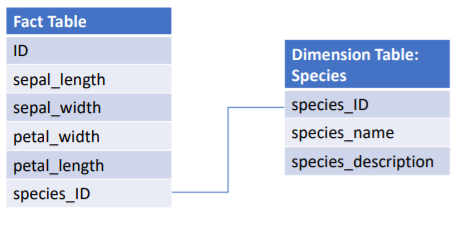

In [266]:
from IPython.display import Image
Image(filename='desktop.png') 

#### Question 3:
---------------------
You are required to write code to  create a decision tree (DT) model using the above dataset (Question 1). In order to achieve the task, you are going to cover the following steps:
* Importing required libraries
* Loading data
* Feature selection
* Splitting data
* Building decision tree model
* Evaluating model
* Visualizing decision trees

#### Answer:

Importing all the libraries needed to create decision tree model

In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree

Loading data

In [147]:
df = pd.read_csv(
    r"C:\Users\Lenovo\Documents\Amir\Others\notebook\exam.csv"
)

The first 5 rows of the loaded DataFrame

In [148]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


The last 5 rows of the loaded DataFrame

In [149]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


Data preparation

-------------------------------

Getting some information of the DataFrame

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


All the data types are correct and there is no null values in the dataset. It can be confirmed that the dataset has no null values by running the following code:

In [151]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Having better understanding of the data by visualizing it

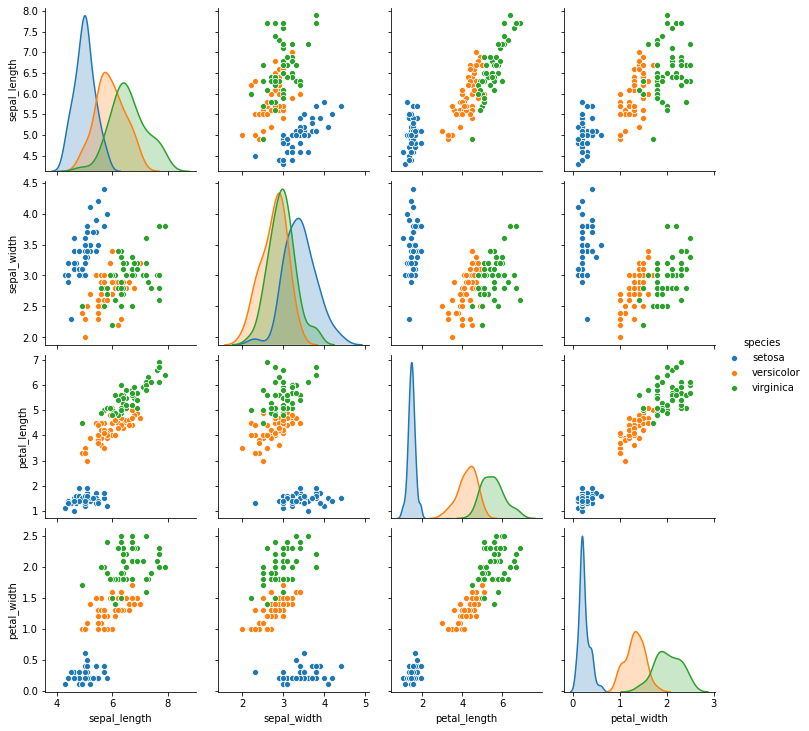

In [152]:
sns.pairplot(df, hue='species')
plt.show()

Enumerate the target variable

In [153]:
print("Before:\n",df.species.unique())

Before:
 ['setosa' 'versicolor' 'virginica']


In [154]:
df.species = df.species.map({
    'setosa':0,
    'versicolor':1,
    'virginica':2
})
print("After:\n",df.species.unique())

After:
 [0 1 2]


Feature selection

--------------------------------

Selecting feature based on the correlation of the variables

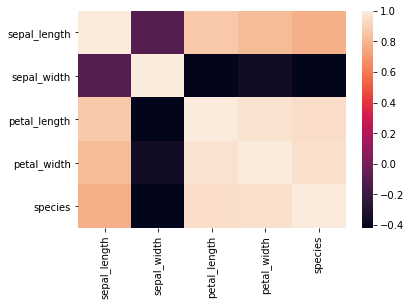

In [155]:
sns.heatmap(df.corr())
plt.show()

In [156]:
df.corr()['species']

sepal_length    0.782561
sepal_width    -0.419446
petal_length    0.949043
petal_width     0.956464
species         1.000000
Name: species, dtype: float64

Since all variables have considerably high correlation, no column is drop from the dataset

Splitting the data

----------------

In [157]:
x = df[df.columns[:-1]]
y = df['species'].values

train_inputs, test_inputs, train_classes, test_classes = train_test_split(
    x,
    y,
    train_size=.7,
    random_state=1
)
print("The length of the training set: ", len(train_inputs))
print("The percentage of the training set: ",
      len(train_inputs)/df.shape[0]*100,'%')
print("The length of the testing set: ", len(test_inputs))
print("The percentage of the testing set: ",
      len(test_inputs)/df.shape[0]*100,'%')

The length of the training set:  105
The percentage of the training set:  70.0 %
The length of the testing set:  45
The percentage of the testing set:  30.0 %


Building decision tree

-------------

Training the model

In [158]:
dtc = tree.DecisionTreeClassifier()
dtc.fit(train_inputs, train_classes)

DecisionTreeClassifier()

Evaluating the decision tree

In [159]:
accuracy = dtc.score(test_inputs, test_classes)
print("The accuracy of the model: ",accuracy)

The accuracy of the model:  0.9555555555555556


0.956 is a good accuracy score. We can say that the model performs well with the iris dataset

Visualizing the tree

------------

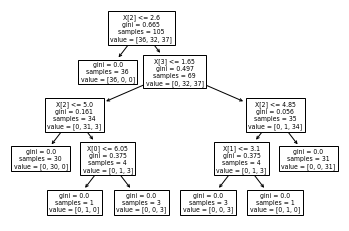

In [160]:
tree.plot_tree(dtc)
plt.show()

#### Question 4:
------------
You are required to write code to  find frequent itemsets using the above dataset (Question 1). In order to achieve the task, you are going to cover the following steps:
* Importing required libraries
* Creating a list from dataset (Question 1)
* Convert list to dataframe with boolean values
* Find frequently occuring itemsets using Apriori algorithm
* Find frequently occuring itemsets using F-P growth
* Mine the association rules

#### Answer:

Importing all the libraries needed

In [170]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

Loading data

In [245]:
df = pd.read_csv(
    r"C:\Users\Lenovo\Documents\Amir\Others\notebook\exam.csv"
)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Preprocessing the data

----------

Understanding the data by reviewing the descriptive statistics

In [246]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Transforming the data

In [247]:
# Change the sepal_length values based on the quantile
q1_sepal_len = df.sepal_length.quantile(.25)
q2_sepal_len = df.sepal_length.quantile(.5)
q3_sepal_len = df.sepal_length.quantile(.75)

df.loc[df.sepal_length < q1_sepal_len,'sepal_length'] = .01
df.loc[(df.sepal_length >= q1_sepal_len) & (df.sepal_length < q2_sepal_len),'sepal_length'] = .02
df.loc[df.sepal_length >= q2_sepal_len,'sepal_length'] = .03

df.sepal_length = df.sepal_length.map({
    .01:'sepal_length: q1',
    .02:'sepal_length: q2',
    .03:'sepal_length: q3'
})

In [248]:
# Change the sepal_width values based on the quantile

q1_sepal_width = df.sepal_width.quantile(.25)
q2_sepal_width = df.sepal_width.quantile(.5)
q3_sepal_width = df.sepal_width.quantile(.75)

df.loc[df.sepal_width < q1_sepal_width,'sepal_width'] = .01
df.loc[(df.sepal_width >= q1_sepal_width) & (df.sepal_width < q2_sepal_width),'sepal_width'] = .02
df.loc[df.sepal_width >= q2_sepal_width,'sepal_width'] = .03

df.sepal_width = df.sepal_width.map({
    .01:'sepal_width: q1',
    .02:'sepal_width: q2',
    .03:'sepal_width: q3'
})

In [249]:
# Change the petal_length values based on the quantile
q1_petal_len = df.petal_length.quantile(.25)
q2_petal_len = df.petal_length.quantile(.5)
q3_petal_len = df.petal_length.quantile(.75)

df.loc[df.petal_length < q1_petal_len,'petal_length'] = .01
df.loc[(df.petal_length >= q1_petal_len) & (df.petal_length < q2_petal_len),'petal_length'] = .02
df.loc[df.petal_length >= q2_petal_len,'petal_length'] = .03

df.petal_length = df.petal_length.map({
    .01:'petal_length: q1',
    .02:'petal_length: q2',
    .03:'petal_length: q3'
})

In [250]:
# Change the petal_width values based on the quantile
q1_petal_width = df.petal_width.quantile(.25)
q2_petal_width = df.petal_width.quantile(.5)
q3_petal_width = df.petal_width.quantile(.75)

df.loc[df.petal_width < q1_petal_width,'petal_width'] = .01
df.loc[(df.petal_width >= q1_petal_width) & (df.petal_width < q2_petal_width),'petal_width'] = .02
df.loc[df.petal_width >= q2_petal_width,'petal_width'] = .03

df.petal_width = df.petal_width.map({
    .01:'petal_width: q1',
    .02:'petal_width: q2',
    .03:'petal_width: q3'
})

Transformed data

In [253]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,sepal_length: q2,sepal_width: q3,petal_length: q1,petal_width: q1,setosa
1,sepal_length: q1,sepal_width: q3,petal_length: q1,petal_width: q1,setosa
2,sepal_length: q1,sepal_width: q3,petal_length: q1,petal_width: q1,setosa
3,sepal_length: q1,sepal_width: q3,petal_length: q1,petal_width: q1,setosa
4,sepal_length: q1,sepal_width: q3,petal_length: q1,petal_width: q1,setosa


Creating boolean list from DataFrame

In [254]:
list_df = []
for i in range(df.shape[0]):
    list_df.append(list(df.iloc[i].dropna()))
    
new_df = pd.DataFrame({'itemsets':list_df})
new_df.head()

,itemsets
0,"[sepal_length: q2, sepal_width: q3, petal_leng..."
1,"[sepal_length: q1, sepal_width: q3, petal_leng..."
2,"[sepal_length: q1, sepal_width: q3, petal_leng..."
3,"[sepal_length: q1, sepal_width: q3, petal_leng..."
4,"[sepal_length: q1, sepal_width: q3, petal_leng..."


In [255]:
te = TransactionEncoder()
te_ary = te.fit(list_df).transform(list_df)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head()

,petal_length: q1,petal_length: q2,petal_length: q3,petal_width: q1,petal_width: q2,petal_width: q3,sepal_length: q1,sepal_length: q2,sepal_length: q3,sepal_width: q1,sepal_width: q2,sepal_width: q3,setosa,versicolor,virginica
0,True,False,False,True,False,False,False,True,False,False,False,True,True,False,False
1,True,False,False,True,False,False,True,False,False,False,False,True,True,False,False
2,True,False,False,True,False,False,True,False,False,False,False,True,True,False,False
3,True,False,False,True,False,False,True,False,False,False,False,True,True,False,False
4,True,False,False,True,False,False,True,False,False,False,False,True,True,False,False


Find frequently occuring itemsets using Apriori algorithm

-------------

Return itemsets with at least 10% support:

In [256]:
fp1 = fpgrowth(df, min_support=0.1, use_colnames=True)
fp1

,support,itemsets
0,0.620000,(sepal_width: q3)
1,0.333333,(setosa)
2,0.273333,(sepal_length: q2)
3,0.246667,(petal_length: q1)
4,0.226667,(petal_width: q1)
...,...,...
101,0.313333,"(sepal_length: q3, petal_length: q3, petal_wid..."
102,0.193333,"(sepal_width: q3, petal_length: q3, petal_widt..."
103,0.193333,"(virginica, sepal_length: q3, petal_length: q3..."
104,0.193333,"(virginica, sepal_length: q3, petal_width: q3,..."


Find frequently occuring itemsets using F-P algorithm

----------------

Return itemsets with at least 10% support:

In [260]:
ap1 = apriori(df, min_support=0.1, use_colnames=True)
ap1

,support,itemsets
0,0.246667,(petal_length: q1)
1,0.253333,(petal_length: q2)
2,0.500000,(petal_length: q3)
3,0.226667,(petal_width: q1)
4,0.206667,(petal_width: q2)
...,...,...
101,0.193333,"(virginica, sepal_length: q3, petal_length: q3..."
102,0.140000,"(sepal_width: q3, petal_width: q1, setosa, sep..."
103,0.193333,"(virginica, sepal_length: q3, petal_width: q3,..."
104,0.106667,"(petal_width: q1, petal_length: q1, setosa, se..."


Mining the association rules

-------------

In [262]:
ap_rules = association_rules(ap1, metric="confidence", min_threshold=.01)
fp_rules = association_rules(fp1, metric="confidence", min_threshold=.01)

Apriori association rule

In [263]:
ap_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(petal_width: q1),(petal_length: q1),0.226667,0.246667,0.180000,0.794118,3.219396,0.124089,3.659048
1,(petal_length: q1),(petal_width: q1),0.246667,0.226667,0.180000,0.729730,3.219396,0.124089,2.861333
2,(petal_length: q1),(sepal_length: q1),0.246667,0.213333,0.140000,0.567568,2.660473,0.087378,1.819167
3,(sepal_length: q1),(petal_length: q1),0.213333,0.246667,0.140000,0.656250,2.660473,0.087378,2.191515
4,(petal_length: q1),(sepal_length: q2),0.246667,0.273333,0.100000,0.405405,1.483191,0.032578,1.222121
...,...,...,...,...,...,...,...,...,...
509,(sepal_length: q3),"(sepal_width: q3, petal_length: q3, petal_widt...",0.513333,0.193333,0.193333,0.376623,1.948052,0.094089,1.294028
510,(petal_length: q3),"(sepal_length: q3, sepal_width: q3, petal_widt...",0.500000,0.193333,0.193333,0.386667,2.000000,0.096667,1.315217
511,(virginica),"(sepal_length: q3, petal_length: q3, petal_wid...",0.333333,0.266667,0.193333,0.580000,2.175000,0.104444,1.746032
512,(sepal_width: q3),"(sepal_length: q3, petal_length: q3, petal_wid...",0.620000,0.313333,0.193333,0.311828,0.995196,-0.000933,0.997812


F-P Growth association rules

In [265]:
fp_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(sepal_width: q3),(setosa),0.620000,0.333333,0.320000,0.516129,1.548387,0.113333,1.377778
1,(setosa),(sepal_width: q3),0.333333,0.620000,0.320000,0.960000,1.548387,0.113333,9.500000
2,(sepal_width: q3),(sepal_length: q2),0.620000,0.273333,0.166667,0.268817,0.983478,-0.002800,0.993824
3,(sepal_length: q2),(sepal_width: q3),0.273333,0.620000,0.166667,0.609756,0.983478,-0.002800,0.973750
4,(setosa),(sepal_length: q2),0.333333,0.273333,0.140000,0.420000,1.536585,0.048889,1.252874
...,...,...,...,...,...,...,...,...,...
509,(sepal_length: q3),"(sepal_width: q3, petal_length: q3, petal_widt...",0.513333,0.193333,0.193333,0.376623,1.948052,0.094089,1.294028
510,(petal_length: q3),"(sepal_length: q3, sepal_width: q3, petal_widt...",0.500000,0.193333,0.193333,0.386667,2.000000,0.096667,1.315217
511,(virginica),"(sepal_length: q3, petal_length: q3, petal_wid...",0.333333,0.266667,0.193333,0.580000,2.175000,0.104444,1.746032
512,(sepal_width: q3),"(sepal_length: q3, petal_length: q3, petal_wid...",0.620000,0.313333,0.193333,0.311828,0.995196,-0.000933,0.997812


#### Question 5:
-----------------
You are required to write code to implement either time-series clustering or density-based clustering model using the above dataset (Question 1). If you select density-based clustering approach to achieve the task, you are going to cover the following steps:
* Importing required libraries
* Load the dataset (Question 1) into a DataFrame object
* Visualize the data, use only two of these attributes at a time
* You may need to normalize the atributes if necessary
* Show positive correlation between attributes if necessary
* Consruct a density-based clustering model and extract cluster labels and outliers to plot your results.

#### Answer:

Importing all the libraries needed to create density-based clustering model

In [161]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

Loading data

In [162]:
df = pd.read_csv(
    r"C:\Users\Lenovo\Documents\Amir\Others\notebook\exam.csv"
)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Visualizing the data

Plotting two variables at a time


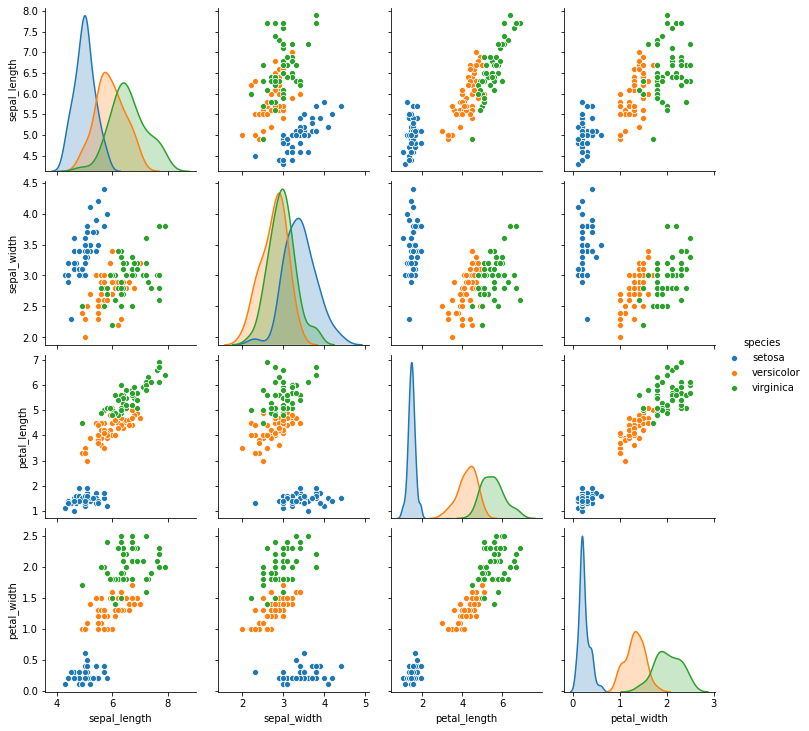

In [163]:
print("Plotting two variables at a time")
sns.pairplot(df, hue='species')
plt.show()

Understanding correlation between the attributes using heat map

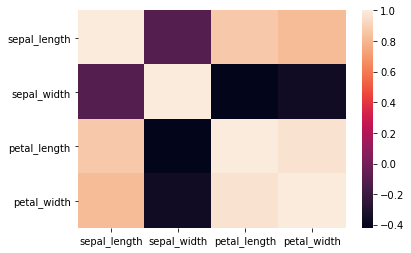

In [164]:
sns.heatmap(df.corr())
plt.show()

The correlation matrix of each attributes

In [165]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


Data preparation

--------------

Target variable is not needed for clustering

In [166]:
df = df[df.columns[:-1]].copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Constructing density-based clustering model

In [167]:
dbscan = DBSCAN()
dbscan.fit(df)
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

Number of group produced by DBSCAN

In [168]:
pd.Series(dbscan.labels_).unique()

array([ 0, -1,  1], dtype=int64)

Plotting the results

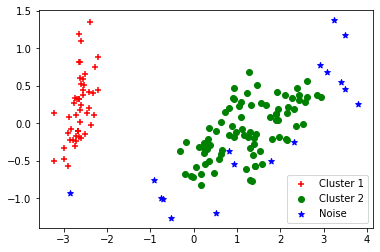

In [169]:
pca = PCA(n_components=2).fit(df)
pca_2d = pca.transform(df)
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')
plt.legend([c1,c2,c3],['Cluster 1','Cluster 2','Noise'])
plt.show()